<a href="https://colab.research.google.com/github/JinyangWang27/singleChannel2DV/blob/main/ResidualVertical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interactive showing the effects of depth, eddy viscosity, bottom roughness, pressure gradient, and transport on the vertical profile of the density-driven flow.

In [1]:
#@title
!pip install ipympl
from google.colab import output, widgets
output.enable_custom_widget_manager()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
%matplotlib widget


In [36]:
def density_driven_flow(H, Av, sf, rho_x, Q):
  
  g = 9.81
  Gamma = g / 1000.
  z = np.linspace(-H, 0, 100)

  r = Av / H / sf
  pressure_gradient = -(Q + Gamma * H**4 / 2 / Av * rho_x * (1/4 + r)) / (g * H**3 / Av * (1/3 + r))

  u = g * H**2 / Av * (.5 * ((z/H)**2 - 1) -r) * pressure_gradient - Gamma * H**3 / 2 / Av * (1 / 3 * ((z/H)**3 + 1) + r) * rho_x

  return u

In [34]:
#@markdown ####** Settings:**
g = 9.81
rho_0 = 1000
Gamma = g / rho_0 
Depth = 10 #@param {type: 'number'}
Vertical_eddy_voscisity = 0.0025 #@param {type: 'number'}
Slip_parameter = 0.01 #@param {type: 'number'}
Discharge_per_unit_width = 0 #@param {type: 'number'}
Density_gradient = 1e-3 #@param {type: 'number'}



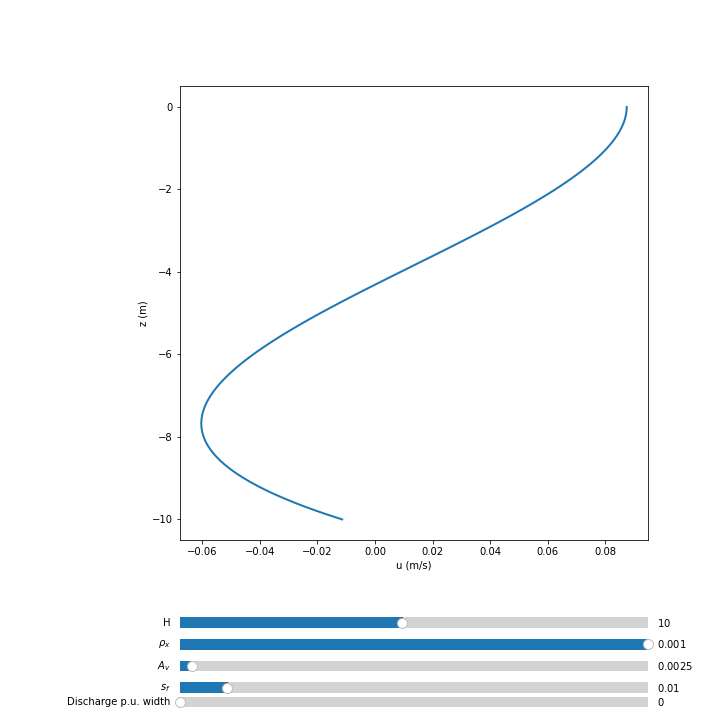

In [35]:
#@title
# Create the figure and the line that we will manipulate
fig, ax = plt.subplots(figsize=(10,10))
line, = plt.plot(density_driven_flow(Depth, Vertical_eddy_voscisity, Slip_parameter, Density_gradient, Discharge_per_unit_width), z, lw=2)

ax.set_xlabel('u (m/s)')
ax.set_ylabel('z (m)')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the Av.
axAv = plt.axes([0.25, 0.06, 0.65, 0.03])
Av_slider = Slider(
    ax=axAv,
    label='$A_v$',
    valmin=0,
    valmax=.1,
    valinit=Vertical_eddy_voscisity,
)

axsf = plt.axes([0.25, 0.03, 0.65, 0.03])
sf_slider = Slider(
    ax=axsf,
    label='$s_f$',
    valmin=0,
    valmax=.1,
    valinit=Slip_parameter,
)

axrhox = plt.axes([0.25, 0.09, 0.65, 0.03])
rhox_slider = Slider(
    ax=axrhox,
    label='$\\rho_x$',
    valmin=0,
    valmax=Density_gradient,
    valinit=Density_gradient,
)

axQ = plt.axes([0.25, 0.01, 0.65, 0.03])
Q_slider = Slider(
    ax=axQ,
    label='Discharge p.u. width',
    valmin=0,
    valmax=10,
    valinit=Discharge_per_unit_width,
)

axH = plt.axes([0.25, 0.12, 0.65, 0.03])
H_slider = Slider(
    ax=axH,
    label='H',
    valmin=1,
    valmax=20,
    valinit=Depth,
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_xdata(density_driven_flow(H_slider.val, Av_slider.val, sf_slider.val, rhox_slider.val, Q_slider.val))
    fig.canvas.draw_idle()

Av_slider.on_changed(update)
sf_slider.on_changed(update)
rhox_slider.on_changed(update)
Q_slider.on_changed(update)
H_slider.on_changed(update)

plt.show()